**Introduction:**

In this project, we aim to implement a voting classifier using the RandomForest, NaiveBayes, XGBClassifier, and Ridge classifiers to enhance the predictive accuracy of our model.

**Data Preprocessing:**

Before building our voting classifier, we preprocess the input data to ensure its suitability for training and evaluation.

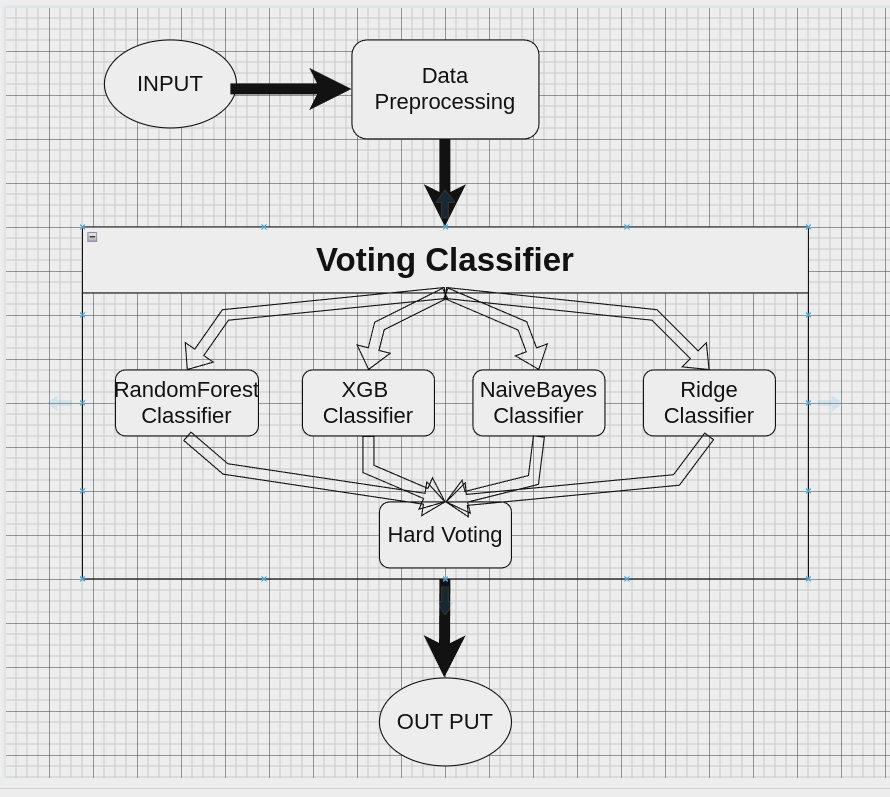

                                                          Figure 1

It's because underthesea is a Python library for natural language processing (NLP) specifically designed for the Vietnamese language.

In [ ]:
import pandas as pd
from underthesea import word_tokenize
import numpy as np

The warnings module provides a simple way to handle warnings that may be generated during the execution of Python code.

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Preprocessing

We defined two file paths "filepath" read file csv data_result_2 it's dataframe after processing file txt with 3 columns **label, filename, content**. We use "with open" to ensure that even if there is an exception the file is closed properly. And using the "splitlines()" method. This list will contain each line of the file as a separate element.

With data example:
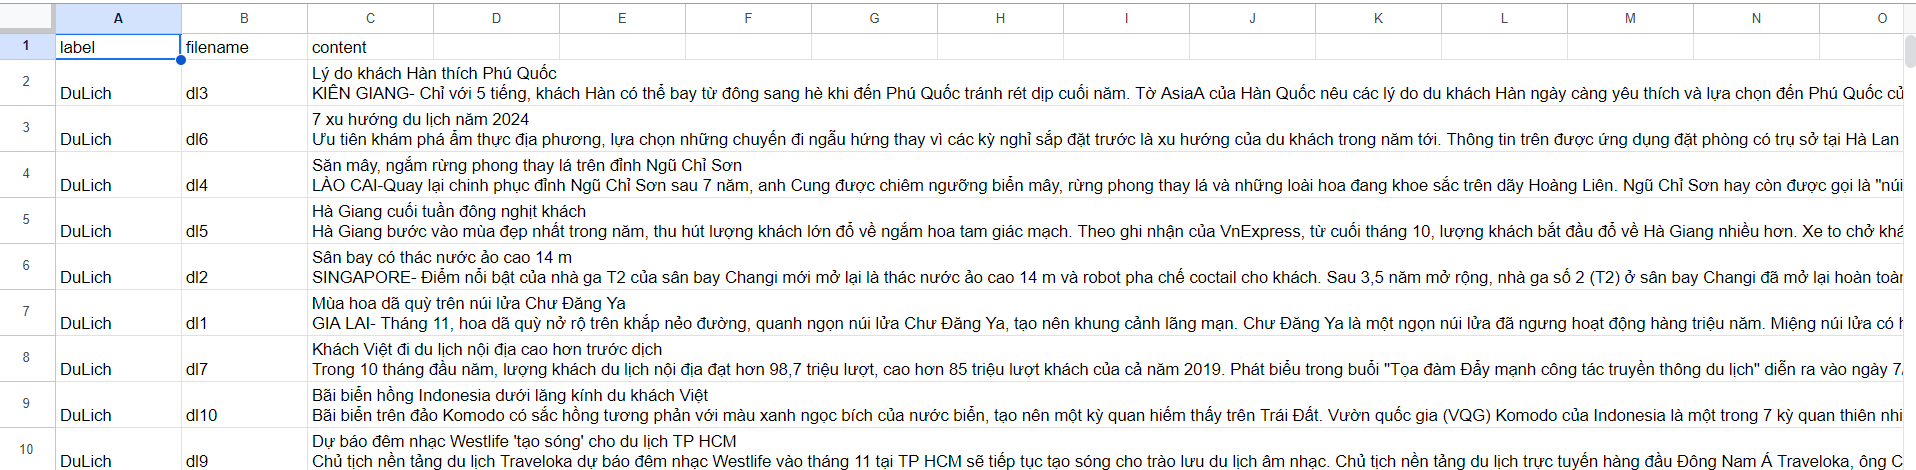

                                                          Figure 2

We have defined a string "all_symbols" containing various punctuation symbols need remove from text.

Then, you have created a translation table using str.maketrans() to specify that you want to remove these symbols from text.

In [ ]:
filepath = "/data/data_result_2.csv"
stp = "/data/vietnamese-stopwords-dash.txt"

# read file word
df = pd.read_csv(filepath)
mydata = df.values.tolist()

# read stopword
with open(stp, 'r') as file:
    stopwords = file.read()

stopwords = stopwords.splitlines()

# symbols listing
all_symbols = ",.?!()[]{}<>:;\"'/\\@#$%^&*_-=+`~|"
translation_table = str.maketrans("", "", all_symbols)

**We define remove_typo(text) function:**

**Lowercasing and Removing Typos:**

The function converts the input text to lowercase using the lower() method.
It replaces newline characters ('\n') with spaces using the replace() method, effectively removing them from the text.

**Removing Symbols:**

The function uses a translation table called translation_table (defined above) to remove symbols from the text. The translate
() method is used for this purpose.

**Tokenization and Stopword Removal:**

We using "word_tokenize()" from the underthesea library with the format="text" option, which returns a string of tokens separated by spaces and split by (" ").
Then, removes stopwords from the tokenized text by filtering out words that are in the stopwords list.

Finally, it joins the remaining words back together into a single string using "join()" with a space as the separator.

In [ ]:
# lower case, remove typo, remove stopword, remove symbols

def remove_typo(text):
    text = text.replace('\n', " ").lower()
    text = text.translate(translation_table)
    text = word_tokenize(text, format="text").split(" ")
    result = [word for word in text if word not in stopwords]
    return ' '.join(result)

**We define to_dictionary(lst) function:**

The input lst is a list of strings.
The function concatenates all the strings in the input list into a single string using ''.join(lst) and split string to words using .split(' ').
The resulting list is converted to a set to remove duplicates using "set()".
The set is then converted back to a list, and the list is sorted alphabetically using "sort()".
The sorted list of unique words is returned as the result.

In [ ]:
# getting all different words, sorted

def to_dictionary(lst):
    result = list(set(' '.join(lst).split(' ')))
    result.sort()
    return result

**We define count_word_occurrences(word_list) function:**

**Splitting the String:**

The input string word_list is split into a list of words using split(' ') and assumes that the words in the input string are separated by spaces.

**Counting Word Occurrences:**

We create empty dictionary word_count to store word occurrences.
Then loop throught list of words obtained from the input string.

**For each word encountered:**

If the word is already a key in the word_count dictionary, its count is incremented by 1 using word_count[word] += 1.

If the word is not yet  it is added with a count of 1 using word_count[word] = 1.
Finally, the function returns the word_count dictionary, which contains the count of occurrences for each word in the input string.

In [ ]:
# counting occurences of words

def count_word_occurrences(word_list):
    word_list = word_list.split(' ')
    word_count = {}

    for word in word_list:
        word_count[word] = word_count.get(word, 0) + 1

    return word_count

**We define build_vector(target, dictionary_word) function:**

target: This is a list of words for which a vector representation is to be built.

dictionary_word: This is a dictionary where keys are words, and values are their respective counts or occurrences.

**Vector Building:**

For each word in the target list, the function checks if the word exists in the dictionary_word dictionary.
If the word exists in the dictionary, its corresponding count (or occurrence) is added to the vector list.
If the word does not exist in the dictionary, a value of 0 is added to the vector list for that word.

**Returning the Result:**

The function returns the vector list, which represents the vectorized representation of the target list based on word occurrences in the dictionary_word dictionary.

In [ ]:
# matching the words with its occurences

def build_vector(target, dictionary_word):
    vector = [dictionary_word[word] if word in dictionary_word else 0 for word in target]
    return vector

**We define vectorizer(df=df, target='content') function:**

**Text Preprocessing:**

The function applies the remove_typo() function to the target column of the DataFrame df using the apply() method.
Building Dictionary:

The function creates a list list1 containing the preprocessed text data from the target column.
It then creates a dictionary dictionary using the to_dictionary() function applied to list1.

**Vectorization:**

For each text in list1, the function applies the count_word_occurrences() function to count word occurrences and then the build_vector() function to build a vector representation based on the dictionary.
The resulting vectors are appended to list2.

**Creating a New DataFrame:**

The function creates a new DataFrame ndf from list2.
It adds a column 'label' to ndf containing the labels from the original DataFrame df.

**Returning the Result:**

The function returns the new DataFrame ndf, which contains the vectorized representations of the text data along with the original labels.

In [ ]:
# apply those functions above

def vectorizer(df=df, target='content'):
    df[target] = df[target].apply(remove_typo)

    list1 = []
    list2 = []
    for text in df[target]:
        list1.append(text)

    dictionary = to_dictionary(list1)

    for i in list1:
        temp = count_word_occurrences(i)
        temp = build_vector(dictionary,temp)
        list2.append(temp)

    ndf = pd.DataFrame(list2)
    ndf['label'] = df['label']
    return ndf

We use vectorizer() function to vectorize text data in DataFrame. The resulting vectorized data is stored in a new ndf DataFrame. They then separated the class labels from the vectorized data:

**y:** This is a Series containing the class labels. It is obtained by using the pop() method to remove the 'label' column from ndf.

**x:** This is the DataFrame containing the vectorized data after removing the 'label' column.

In [ ]:
ndf = vectorizer()
y = ndf.pop('label')       #classes
x = ndf                    #data

**Splitting dataset:**
We split the dataset into training and validation sets. The data into **xtrain, xval, ytrain, and yval**, with 70% of the data used for training and 30% for validation.

**Standard scaling:**
And used StandardScaler for standardizing the features by removing the mean and scaling to unit variance. Applied to both xtrain and xval by using transform.

**Fit and transform the training labels:**
This class is used for encoding target labels with values between 0 and n_classes-1.


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# splitting dataset
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size=0.3)

# standard scaling
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xval = scaler.transform(xval)

# Fit and transform the training labels
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)

# Transform the validation labels
yval_encoded = label_encoder.transform(yval)

**Explained Variance Ratio for Each Principal Component:**

We used to visualize the explained variance ratio for each principal component obtained from the PCA analysis.

And fits it to the training data xtrain using the fit() method. After fitting the PCA model, the user calculates the explained variance ratio for each principal component. Show result by plt.show().

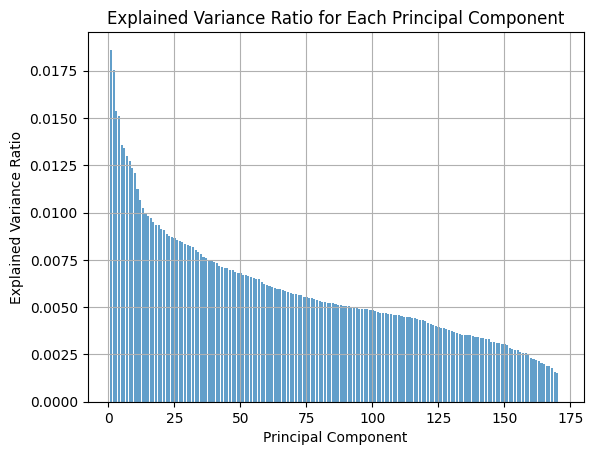

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# pca checking
reductor = PCA()
reductor.fit(xtrain)
explained_var_ratio = reductor.explained_variance_ratio_

plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.7)
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# **Voting Classifier**

## NaiveBayes Model

**We have defined the NaiveBayesClassife class for the library-less Naive Bayes classifier:**

__init__(): Initializes the class with the class_probs and feature_probs properties set to None and the classes set to None.

**fit(X, y)**: Fit the classifier to the training data X and label y. It calculates class probability and feature probability based on training data.

**predict(X):** Predict the class label for input data X using calculated probability.

Then creates an instance of the NaiveBayesClassifier class named nb_classifier and fits it to the training data xtrain and labels the ytrain using the **fit()** method.

Next, makes a prediction about the xval validation data using the **predict()**method and saves the prediction in the prediction variable.

Finally, We calculates the accuracy score of the predictions by comparing them with the actual yval labels using the **precision_score()** function **from sklearn.metrics.**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from naivebayes_module import NaiveBayesClassifier

nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(xtrain, ytrain)


predictions = nb_classifier.predict(xval)

accuracy_score(predictions, yval)


0.9459459459459459

The predicted String is named **'Predict'** and the **yval** String is reset to have a new index using reset_index(drop=True) before concatenation. The joining axis is set to 1 (column), resulting in a DataFrame where each row contains the prediction and its corresponding actual value from **yval**.

Finally, we prints the resulting with **Predictions** compare with **label**.

In [ ]:
# result comparing
result_df = pd.concat([pd.Series(predictions, name='Predictions'), yval.reset_index(drop=True)], axis=1)

print(result_df)

   Predictions    label
0       amthuc   amthuc
1        Sport    Sport
2       DuLich   DuLich
3       Health   Health
4      Fashion  Fashion
..         ...      ...
69     Fashion  Fashion
70       Sport    Sport
71       Sport    Sport
72       Sport    Sport
73      movies  Fashion

[74 rows x 2 columns]


## RandomForest

We imported the **RandomForestClassifier** and **VotingClassifier** from **sklearn.ensemble**. We have then created an instance of the **RandomForestClassifier** called **rf** and **fitted** it to the training data
 **xtrain** and labels **ytrain** using the **fit()** method.

Next, we predictions on the validation data xval using the **predict()** method of the rf classifier and stores the predictions in the **rf_pred** variable.

Finally, calculates the accuracy score of the predictions by comparing them with the actual labels yval using the **accuracy_score()** function from **sklearn.metrics.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

rf_pred = rf.predict(xval)
accuracy_score(rf_pred, yval)

0.9324324324324325

We imported **GridSearchCV** from sklearn.model_selection to perform hyperparameter tuning for a random forest classifier.

We defined a hyperparameter grid **rf_param_grid** containing different values for **n_estimators**, **max_depth**, **min_samples_split**, and **min_samples_leaf**.

A **GridSearchCV** object **rf_grid_search** is created with the following parameters:

**estimator**=**rf**: The random forest classifier instance rf is used as the **estimator**.
**param_grid=rf_param_grid**: The hyperparameter grid **rf_param_grid** is specified for the grid search.
**cv=3:** Cross-validation with 3 folds is used.
**scoring='accuracy'**: The scoring metric for evaluation is set to accuracy.
The **fit()** method of the **rf_grid_search** object is then called with the training data **xtrain** and labels **ytrain** to perform the grid search and find the best model based on the specified hyperparameters.

The best model obtained from the grid search is stored in rf_best_model. Predictions are made on the validation set xval using this best model, and the accuracy score is calculated and printed using the **accuracy_score()** function **from sklearn.metrics**.

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [50,70, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
rf_grid_search.fit(xtrain, ytrain)

# Get the best model
rf_best_model = rf_grid_search.best_estimator_

# Make predictions on the validation set
rf_pred = rf_best_model.predict(xval)

# Calculate and print the accuracy on the validation set
print(f"RandomForest Gridsearch Accuracy: {accuracy_score(rf_pred, yval)}")


RandomForest Gridsearch Accuracy: 0.9324324324324325


## Ridge Classifier

We imported **RidgeClassifier** from **sklearn.linear_model** to create a **Ridge Classifier.**

We created an instance of **RidgeClassifier** called **ridge** and **fitted** it to the training data **xtrain** and the encoded training labels **ytrain_encoded** using the **fit()** method.

Next, We makes predictions on the validation data **xval** using the **predict()** method of the **ridge** classifier and stores the predictions in the **ridge_pred** variable.

Finally, We calculates the **accuracy score** of the predictions by comparing them with the encoded actual labels **yval_encoded** using the **accuracy_score()**function from **sklearn**.**metrics**.

In [ ]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()
ridge.fit(xtrain, ytrain_encoded)

ridge_pred = ridge.predict(xval)
accuracy_score(ridge_pred, yval_encoded)

0.9324324324324325

We defined a hyperparameter grid **ridge_param_grid** for the **RidgeClassifier**, containing different values for alpha and **fit_intercept**.

A **GridSearchCV** object **ridge_grid_search** is created with the following parameters:

**estimator=ridge**: The** RidgeClassifier** instance ridge is used as the estimator.
**param_grid=ridge_param_grid:** The hyperparameter grid **ridge_param_grid** is specified for the grid search.
**cv=3:** **Cross-validation** with 3 folds is used.
**scoring='accuracy'**: The scoring metric for evaluation is set to accuracy.

The **fit()** method of the **ridge_grid_search** object is then called with the training data **xtrain** and the encoded training labels **ytrain_encoded** to perform the grid search and find the best model based on the specified hyperparameters.

The best model obtained from the grid search is stored in **ridge_best_model**. Predictions are made on the validation set xval using this best model, and the accuracy score is calculated and printed using the **accuracy_score()** function from **sklearn.metrics**.

In [ ]:
# Define the hyperparameter grid for RidgeClassifier
ridge_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 2],
    'fit_intercept': [True, False],
}
# Create the GridSearchCV object for RidgeClassifier
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
ridge_grid_search.fit(xtrain, ytrain_encoded)

# Get the best model for RidgeClassifier
ridge_best_model = ridge_grid_search.best_estimator_

# Make predictions on the validation set for RidgeClassifier
ridge_pred = ridge_best_model.predict(xval)

# Calculate and print the accuracy on the validation set for RidgeClassifier
print(f"RidgeClassifier Gridsearch Accuracy: {accuracy_score(ridge_pred, yval_encoded)}")


RidgeClassifier Gridsearch Accuracy: 0.9324324324324325


## XGBClassifier

We imported **XGBClassifier** from **xgboost** to create an **XGBoost classifier**.

And created an instance of **XGBClassifier** called **xgb** and **fitted** it to the training data **xtrain** and the encoded training labels **ytrain_encoded** using the **fit()** method.

Next, makes predictions on the validation data **xval** using the **predict()** method of the **xgb** classifier and stores the predictions in the **xgb_pred** variable.

Finally, calculates the accuracy score of the predictions by comparing them with the encoded actual labels **yval_encoded** using the **accuracy_score(**) function from **sklearn.metrics**.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain, ytrain_encoded)
xgb_pred = xgb.predict(xval)
accuracy_score(xgb_pred, yval_encoded)

0.9054054054054054

# Voting Model


We defined a **VotingClassifier** class with methods to fit multiple classifiers on the data and make predictions based on the majority vote from these classifiers. They have then created an instance of this **VotingClassifier** called **voting_classifier**, passing a list of classifiers **[rf_best_model, ridge_best_model, xgb, nb_classifier]** to it.

The **fit()** method of the **voting_classifier** object is used to train the voting classifier on the training data xtrain and the encoded training labels **ytrain_encoded**.

Next, predictions are made on the validation set xval using the predict() method of the **voting_classifier** object, and the accuracy score is calculated and printed using the **accuracy_score()** function from sklearn.metrics.

In [ ]:
from voting_classifier import VotingClassifier

voting_classifier = VotingClassifier(classifiers=[rf_best_model, ridge_best_model, xgb, nb_classifier])

# Train the voting classifier
voting_classifier.fit(xtrain, ytrain_encoded)

# Make predictions on the validation set
voting_predictions = voting_classifier.predict(xval)

# Calculate and print accuracy
accuracy = accuracy_score(yval_encoded, voting_predictions)
print(f"Voting Classifier Accuracy: {accuracy}")


Voting Classifier Accuracy: 0.9459459459459459


**Conclusion:**

In conclusion, the implementation of a voting classifier allowed us to leverage the strengths of multiple models and create a more robust predictive model. And We get the Voting Classifier Accuracy.